In [1]:
using Plots

In [2]:
function init_grid(row, col, prob=0.5)
    return rand(row, col) .< prob
end

function plot_grid(grid)
    heatmap(grid, axis=false, colorbar=false)
end

function next_gen(grid)
    
    grid_copy = copy(grid)
    rows, cols = size(grid_copy)
    
    for i in 1:rows
        for j in 1:cols
            
            neighbours = 0
            
            for ni in -1:1, nj in -1:1
                if !(ni == 0 && nj == 0)
                    
                    ni, nj = ni + i, nj + j
                    
                    if (1 <= ni <= rows && 1 <= nj <= cols)
                        neighbours += grid[ni, nj]
                    end
                end
            end
            
            if neighbours == 3
                grid_copy[i, j] = 1
                
            elseif (neighbours < 2 || neighbours > 3)
                grid_copy[i, j] = 0
            end
        end
    end
    
    return grid_copy
end

next_gen (generic function with 1 method)

In [3]:
function animate_game_of_life(grid, generations)
    anim = @animate for gen in 1:generations
        plot_grid(grid)
        grid = next_gen(grid)
    end
    
    gif(anim, "gol.gif", fps=5)
end

animate_game_of_life (generic function with 1 method)

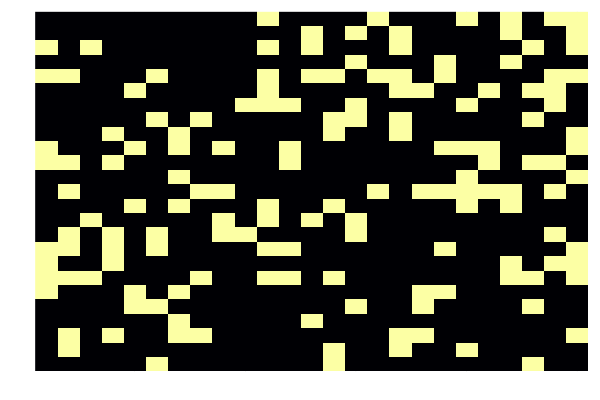

In [13]:
rows = 25
columns = 25
alive_ratio = 0.25
game_grid = init_grid(rows, columns, alive_ratio);
plot_grid(game_grid)

[ Info: Saved animation to C:\Users\prebe\Fritid\Reinforcement Learning training\gol.gif


Plots.AnimatedGif("C:\\Users\\prebe\\Fritid\\Reinforcement Learning training\\gol.gif")
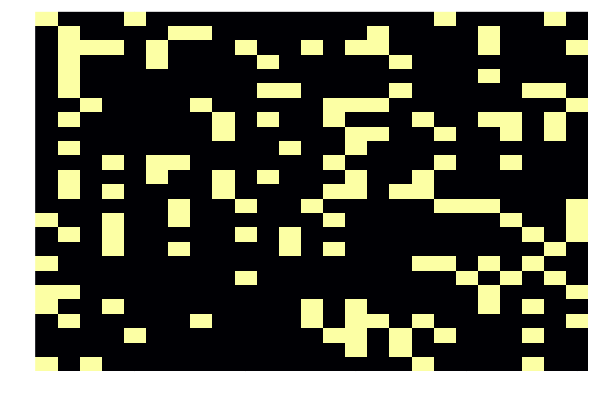

In [6]:
animate_game_of_life(game_grid, 250)